<img src="https://www.wellcomeconnectingscience.org/wp-content/themes/new_wellcome_connecting_science/dist/assets/svg/logo.svg" alt="WCS Logo" width="150" style="float: left;">
<img src="https://github.com/EveliaCoss/Tutorial_ISCB_LATAM_scATACseq/blob/main/Logo_JAGUAR.png?raw=true" alt="WCS Logo" width="150" style="float: right;">





# Analyzing PBMCs Single Cell ATAC- Seq (scATAC-Seq) and Multiome data: Theory and practice

## About the course 📌

This course is part of the Workshop [Single Cell Genomic Approaches to Study the Immune System - Latin America & the Caribbean](https://coursesandconferences.wellcomeconnectingscience.org/event/single-cell-genomic-approaches-to-study-the-immune-system-latin-america-the-caribbean-20241109/) (9-11 Novembrer 2024), Universidad CES, Medellín, Colombia.

- **Date:** 11 November 2024
- **Course duration**: 5 hours

**Speakers:**

- <font color='orange'>Diego Ramirez</font> - Bachelor in Genomic Sciences, Escuela Nacional de Estudios Superiores Unidad Juriquilla UNAM (ENES Juriquilla), Mexico.
- <font color='orange'>Evelia Lorena Coss-Navarrete</font> - PostDoc, International Laboratory for Human Genome Research (LIIGH)-UNAM, Mexico. Contact: [Web page](https://eveliacoss.github.io/)

### About datasets



# 3️⃣ Practical 15: Multiome analysis & Integration

### Settings 💻 <a name="setup"></a>

In [ ]:
start_time <- Sys.time()
shell_call <- function(command, ...) {
  result <- system(command, intern = TRUE, ...)
  cat(paste0(result, collapse = "\n"))
}

loadPackages = function(pkgs){
  myrequire = function(...){
    suppressWarnings(suppressMessages(suppressPackageStartupMessages(require(...))))
  }
  ok = sapply(pkgs, require, character.only=TRUE, quietly=TRUE)
  if (!all(ok)){
    message("There are missing packages: ", paste(pkgs[!ok], collapse=", "))
  }
}

download.file("https://github.com/eddelbuettel/r2u/raw/master/inst/scripts/add_cranapt_jammy.sh",
              "add_cranapt_jammy.sh")
Sys.chmod("add_cranapt_jammy.sh", "0755")
shell_call("./add_cranapt_jammy.sh")
bspm::enable()
options(bspm.version.check=FALSE)
shell_call("rm add_cranapt_jammy.sh")

cranPkgs <- c("BiocManager", "Seurat", "cowplot", "SingleCellExperiment", "scDblFinder", "Rtsne", "hdf5r", "clustree",
              "tidyverse", "Signac", "SeuratObject", "hdf5r", "reticulate", "patchwork", "ggplot2", "future")
biocPkgs <- c("celldex", "SingleR", "SeuratDisk", "clusterProfile", "preprocessCore", "EnsDb.Hsapiens.v86", "EnsDb.Hsapiens.v75",
              "biovizBase", "LoomExperiment", "SingleCellExperiment", "JASPAR2020", "TFBSTools", "glmGamPoi", "clusterProfiler", "org.Hs.eg.db"
              , "BSgenome.Hsapiens.UCSC.hg38", "")

# Install packages from CRAN
install.packages(cranPkgs, ask=FALSE, update=TRUE, quietly=TRUE)

# Install packages from Bioconductor
if (!requireNamespace("BiocManager", quietly = TRUE)) {
    install.packages("BiocManager")
}
BiocManager::install(biocPkgs)

# Install SeuratData and sceasy from GitHub
if (!requireNamespace("devtools", quietly = TRUE)) {
    install.packages("devtools")
}

devtools::install_github('satijalab/seurat-data')
devtools::install_github("cellgeni/sceasy")

# Verify and install SeuratData from Bioconductor if necessary
if (!requireNamespace("SeuratData", quietly = TRUE)) {
    BiocManager::install("SeuratData")
}

#Install presto
if (!requireNamespace("remotes", quietly = TRUE))
  install.packages('remotes')
remotes::install_github('immunogenomics/presto')

loadPackages = function(pkgs){
  myrequire = function(...){
    suppressWarnings(suppressMessages(suppressPackageStartupMessages(require(...))))
  }
  ok = sapply(pkgs, require, character.only=TRUE, quietly=TRUE)
  if (!all(ok)){
    message("There are missing packages: ", paste(pkgs[!ok], collapse=", "))
  }
}

pkgs = c("Rtsne", "Seurat", "SingleCellExperiment", "scDblFinder", "tidyverse", "future",
         "cowplot", "preprocessCore", "SingleR", "clusterProfile", "celldex", "SeuratDisk", "pheatmap", "patchwork", "ggplot2",
         "hdf5r", "clustree", "tidyverse", "Signac", "SeuratObject", "hdf5r", "reticulate", "EnsDb.Hsapiens.v86", "EnsDb.Hsapiens.v75",
         "biovizBase", "LoomExperiment", "SingleCellExperiment", "glmGamPoi", "clusterProfiler", "org.Hs.eg.db",
         "BSgenome.Hsapiens.UCSC.hg38", "presto")
# Load the packages
loadPackages(pkgs)

loaded_packages <- sessionInfo()$otherPkgs
names(loaded_packages)

cat("Versión de R:", R.version$version.string, "\n")
cat("Numero de cores:", availableCores(), "\n")
packageVersion("Signac")
plan("multicore", workers = 2)
plan()
options(future.globals.maxSize = 10 * 1024^3)

53 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Building dependency tree...
Reading state information...
ca-certificates is already the newest version (20240203~22.04.1).
gnupg is already the newest version (2.2.27-3ubuntu2.1).
wget is already the newest version (1.21.2-2ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 53 not upgraded.
-----BEGIN PGP PUBLIC KEY BLOCK-----

mQINBFM+sY8BEADA70T+U0/2WNjOTLvytuXLvBC4vgA8hYvOaBS1cL3d8lu4mwr4
W84/6p4v/mXle/0eIO2D2g+XfK72ZHZxpS+bb7yPxrkCDLGxwUd/khtTJHSbbKFo
J73AsABflMe+8qv+E74+QTiXErTCNioFRz18sa0EvOnEAiokau6TZVYY2z9YjBNI
yEjTi+z+g8c1RL6VmrFEpTicTpafOLbkRyw0VKnAKG7Ytp3Ksc1G9/IAoKw3Q9La
0DJb5iX6hyB7+PNid6htK4LtPKZ2dNSrnRvNNkjj5BgcM2AT1hmxbzHNzIVmPoKA
CQFrkdjog3/PcyjdtZG7cfoSDXrbIAZeAa2ngLv9C/DJatVDd6maPOe66gLo7+As
ErMvO9vtiouqLdurW+Lhx0jFW9Ca3g1taLfbSDyS3X1mOGWcisbQvBqkIuoDQTeS
V4Z04wrwTZ1HtweKG/s5fmPtZNGWVI5YNRLIwdmbGzFTMPu2XTAOd+xSK2H+46Kh
Sh4kFeP6pBh5No4ET1MzIuDAHwl0J+mbWKPH4tIosYkcVmv

Tracing function "install.packages" in package "utils"

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.25), R 4.4.1 (2024-06-14)

Warning message:
"package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'celldex' 'SingleR' 'preprocessCore'
  'EnsDb.Hsapiens.v86' 'EnsDb.Hsapiens.v75' 'biovizBase' 'LoomExperiment'
  'SingleCellExperiment' 'JASPAR2020' 'TFBSTools' 'glmGamPoi' 'clusterProfiler'
  'org.Hs.eg.db' 'BSgenome.Hsapiens.UCSC.hg38'"
Installing package(s) 'SeuratDisk', 'clusterProfile'

Warning message:
"packages 'SeuratDisk', 'clusterProfile' are not available for Bioconductor version '3.19'

Versions of these packages for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-adm

[1] "presto"                      "data.table"                 
 [3] "Rcpp"                        "BSgenome.Hsapiens.UCSC.hg38"
 [5] "BSgenome"                    "rtracklayer"                
 [7] "Biostrings"                  "XVector"                    
 [9] "org.Hs.eg.db"                "clusterProfiler"            
[11] "glmGamPoi"                   "LoomExperiment"             
[13] "BiocIO"                      "rhdf5"                      
[15] "biovizBase"                  "EnsDb.Hsapiens.v75"         
[17] "EnsDb.Hsapiens.v86"          "ensembldb"                  
[19] "AnnotationFilter"            "GenomicFeatures"            
[21] "AnnotationDbi"               "reticulate"                 
[23] "Signac"                      "clustree"                   
[25] "ggraph"                      "hdf5r"                      
[27] "patchwork"                   "pheatmap"                   
[29] "celldex"                     "SingleR"                    
[31] "preprocessCore"              "cowplot"                    
[33] "future"                      "lubridate"                  
[35] "forcats"                     "stringr"                    
[37] "dplyr"                       "purrr"                      
[39] "readr"                       "tidyr"                      
[41] "tibble"                      "ggplot2"                    
[43] "tidyverse"                   "scDblFinder"                
[45] "SingleCellExperiment"        "SummarizedExperiment"       
[47] "Biobase"                     "GenomicRanges"              
[49] "GenomeInfoDb"                "IRanges"                    
[51] "S4Vectors"                   "BiocGenerics"               
[53] "MatrixGenerics"              "matrixStats"                
[55] "Seurat"                      "SeuratObject"               
[57] "sp"                          "Rtsne"

Versión de R: R version 4.4.1 (2024-06-14) 
Numero de cores: 2 


[1] '1.14.0'

multicore:
- args: function (..., workers = 2, envir = parent.frame())
- tweaked: TRUE
- call: plan("multicore", workers = 2)

## Step 1: Load the data and create the Seurat object

In [ ]:
# Raw data
system("wget https://cf.10xgenomics.com/samples/cell-arc/2.0.0/pbmc_granulocyte_sorted_3k/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5")
# Fragments files
system("wget https://cf.10xgenomics.com/samples/cell-arc/2.0.0/pbmc_granulocyte_sorted_3k/pbmc_granulocyte_sorted_3k_atac_fragments.tsv.gz")
# Fragments files index
system("wget https://cf.10xgenomics.com/samples/cell-arc/2.0.0/pbmc_granulocyte_sorted_3k/pbmc_granulocyte_sorted_3k_atac_fragments.tsv.gz.tbi")

### Processing of the data

In [ ]:
# load the RNA and ATAC data
counts <- Read10X_h5("pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5")
fragpath <- "pbmc_granulocyte_sorted_3k_atac_fragments.tsv.gz"

Genome matrix has multiple modalities, returning a list of matrices for this genome



In [ ]:
# get gene annotations for hg38
annotation <- GetGRangesFromEnsDb(ensdb = EnsDb.Hsapiens.v86)
seqlevels(annotation) <- paste0('chr', seqlevels(annotation))

# create a Seurat object containing the RNA adata
multiome <- CreateSeuratObject(
  counts = counts$`Gene Expression`,
  assay = "RNA"
)

# create ATAC assay and add it to the object
multiome[["ATAC"]] <- CreateChromatinAssay(
  counts = counts$Peaks,
  sep = c(":", "-"),
  fragments = fragpath,
  annotation = annotation
)
rm(annotation)

Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warn

In [ ]:
multiome

An object of class Seurat 
134920 features across 2711 samples within 2 assays 
Active assay: RNA (36601 features, 0 variable features)
 1 layer present: counts
 1 other assay present: ATAC

###  Step 2: Computing QC metrics
We can compute per-cell quality control metrics using the DNA accessibility data and remove cells that are outliers for these metrics, as well as cells with low or unusually high counts for either the RNA or ATAC assay.

In [ ]:
DefaultAssay(multiome) <- "ATAC"

multiome <- TSSEnrichment(multiome)

Extracting TSS positions

Extracting fragments at TSSs

Warning message in size + sum(size_args, na.rm = FALSE):
"NAs produced by integer overflow"

Computing TSS enrichment score



In [ ]:
multiome <- NucleosomeSignal(multiome)

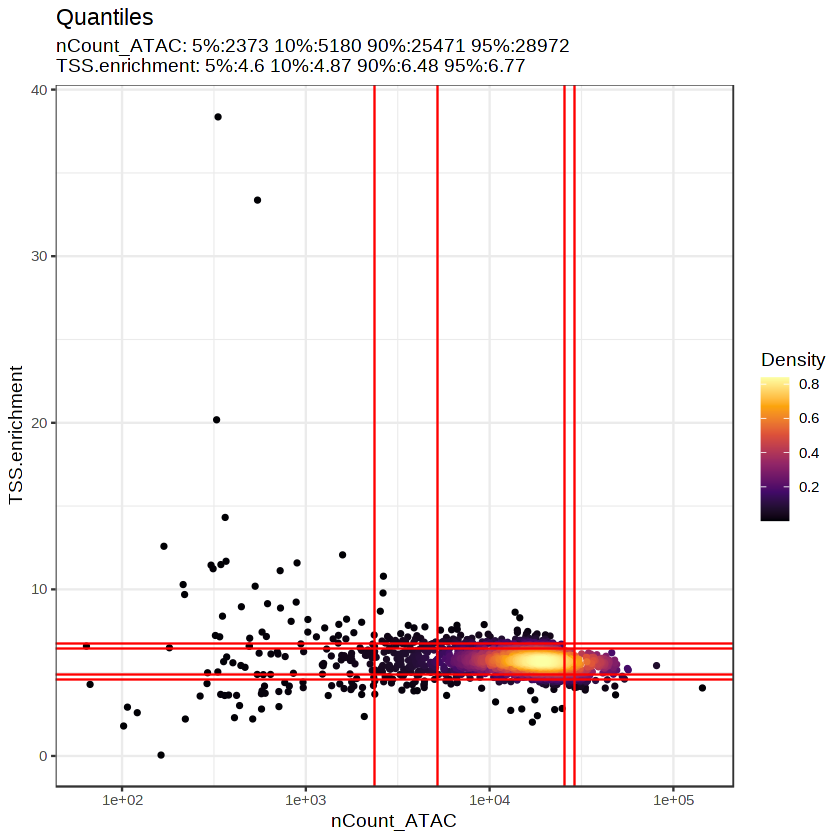

In [ ]:
DensityScatter(multiome, x = 'nCount_ATAC', y = 'TSS.enrichment', log_x = TRUE, quantiles = TRUE)

We can plot the distribution of each QC metric separately using a violin plot:

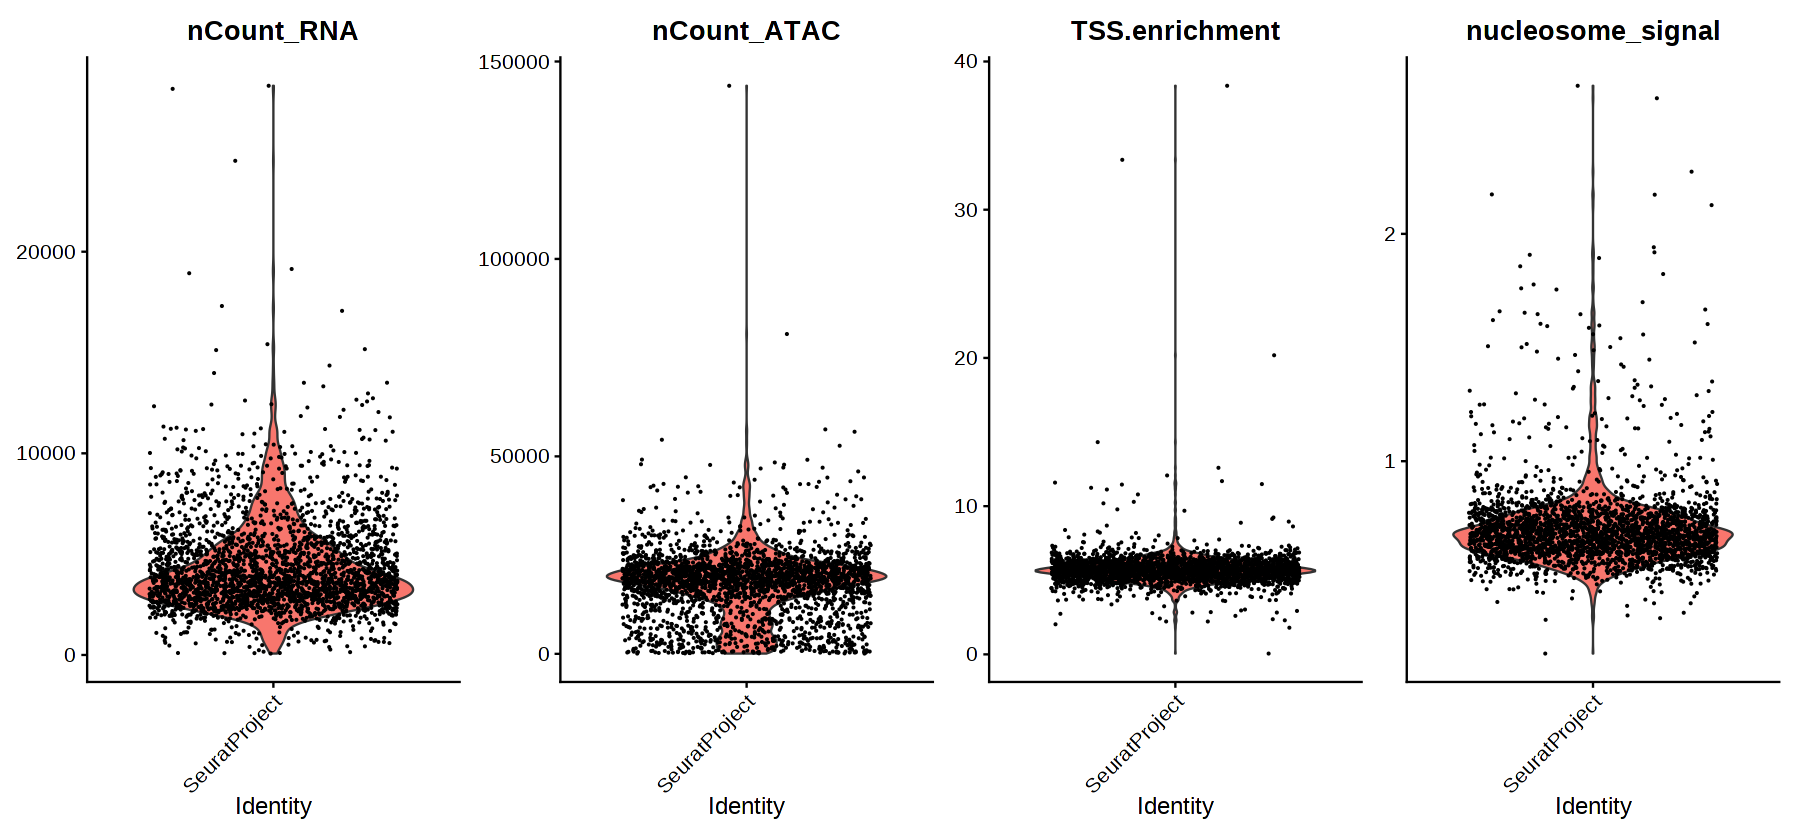

In [ ]:
# To change the screen size
options(repr.plot.width = 15, repr.plot.height = 7)

# plot
VlnPlot(
  object = multiome,
  features = c("nCount_RNA", "nCount_ATAC", "TSS.enrichment", "nucleosome_signal"),
  ncol = 4,
  pt.size = 0.1
)

Finally we remove cells that are outliers for these QC metrics. The exact QC thresholds used will need to be adjusted according to your dataset.

In [ ]:
# filter out low quality cells
multiome <- subset(
  x = multiome,
  subset = nCount_ATAC < 30000 &
    nCount_RNA < 15000 &
    nCount_ATAC > 1800 &
    nCount_RNA > 1000 &
    nucleosome_signal < 1 &
    TSS.enrichment > 4
)
multiome

An object of class Seurat 
134920 features across 2344 samples within 2 assays 
Active assay: ATAC (98319 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: RNA

### Step 3: Analysis on the RNA assay
We can normalize the gene expression data using SCTransform, and reduce the dimensionality using PCA.

In [ ]:
multiome@assays

$RNA
Assay (v5) data with 36601 features for 2344 cells
First 10 features:
 MIR1302-2HG, FAM138A, OR4F5, AL627309.1, AL627309.3, AL627309.2,
AL627309.5, AL627309.4, AP006222.2, AL732372.1 
Layers:
 counts 

$ATAC
ChromatinAssay data with 98319 features for 2344 cells
Variable features: 0 
Genome: 
Annotation present: TRUE 
Motifs present: FALSE 
Fragment files: 1 


In [ ]:
DefaultAssay(multiome) <- "RNA"
multiome <- SCTransform(multiome)
multiome <- RunPCA(multiome)

Running SCTransform on assay: RNA

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Variance stabilizing transformation of count matrix of size 18611 by 2344

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 2344 cells

Found 8 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 18611 genes

Computing corrected count matrix for 18611 genes

Calculating gene attributes

Wall clock passed: Time difference of 42.92118 secs

Determine variable features

Centering data matrix

Warning message in size + sum(size_args, na.rm = FALSE):
"NAs produced by integer overflow"
Set default assay to SCT

PC_ 1 
Positive:  RPS27, IL32, LEF1, BCL11B, IL7R, BCL2, EEF1A1, RPS27A, RPL13A, RPL13 
	   INPP4B, RPL41, LTB, RPS12, BACH2, CAMK4, RPS29, RPL23A, RPS18, RPL3 
	   RPL30, SKAP1, RPS2, RPS26, TRAC, TRBC1, RPS3, RPL

In [ ]:
multiome@assays

$RNA
Assay (v5) data with 36601 features for 2344 cells
First 10 features:
 MIR1302-2HG, FAM138A, OR4F5, AL627309.1, AL627309.3, AL627309.2,
AL627309.5, AL627309.4, AP006222.2, AL732372.1 
Layers:
 counts 

$ATAC
ChromatinAssay data with 98319 features for 2344 cells
Variable features: 0 
Genome: 
Annotation present: TRUE 
Motifs present: FALSE 
Fragment files: 1 

$SCT
SCTAssay data with 18611 features for 2344 cells, and 1 SCTModel(s) 
Top 10 variable features:
 GNLY, IGKC, IGHM, IGLC2, BANK1, NKG7, CCL5, VCAN, IGLC3, TCF4 


### Step 4: Analysis on the ATAC assay
Here we process the DNA accessibility assay the same way we would process a scATAC-seq dataset, by performing latent semantic indexing (LSI).

In [ ]:
DefaultAssay(multiome) <- "ATAC"
multiome <- FindTopFeatures(multiome, min.cutoff = 5)
multiome <- RunTFIDF(multiome)
multiome <- RunSVD(multiome)

Performing TF-IDF normalization

Warning message in RunTFIDF.default(object = GetAssayData(object = object, layer = "counts"), :
"Some features contain 0 total counts"
Running SVD

Scaling cell embeddings



In [ ]:
# Load the pre-processed scRNA-seq data for PBMCs
system("wget https://signac-objects.s3.amazonaws.com/pbmc_10k_v3.rds")
pbmc_rna <- readRDS("pbmc_10k_v3.rds")
pbmc_rna <- UpdateSeuratObject(pbmc_rna)
# free memory
gc()

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Updating matrix keys for DimReduc 'pca'

Updating matrix keys for DimReduc 'tsne'

Updating matrix keys for DimReduc 'umap'

Warning message:
"Assay RNA changing from Assay to Assay"
Warning message:
"Graph RNA_nn changing from Graph to Graph"
Warning message:
"Graph RNA_snn changing from Graph to Graph"
Warning message:
"DimReduc pca changing from DimReduc to DimReduc"
Warning message:
"DimReduc tsne changing from DimReduc to DimReduc"
Warning message:
"DimReduc umap changing from DimReduc to DimReduc"
Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Updating slots in RNA_nn

Setting default assay of RNA_nn to RNA

Updating slots in RNA_snn

Setting default assay of RNA_snn to RNA

Updating slots in pca

Updating slots in tsne

Setting tsne DimReduc to global

Updating slots in umap

Setting umap DimReduc to global

Set

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,17995155,961.1,26569360,1419.0,26569360,1419.0
Vcells,264469521,2017.8,427824682,3264.1,356022435,2716.3


In [ ]:
pbmc_rna <- SCTransform(pbmc_rna) # We have to normalize using SCTransform
pbmc_rna <- FindNeighbors(pbmc_rna, dims = 1:50, assay = "RNA", graph.name = "rna_snn")
pbmc_rna <- RunSPCA(pbmc_rna, assay = "RNA", features = VariableFeatures(pbmc_rna), graph = "rna_snn", reduction.name = "spca")

Running SCTransform on assay: RNA

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 18501 by 9432

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells

Found 226 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 18501 genes

Computing corrected count matrix for 18501 genes

Calculating gene attributes

Wall clock passed: Time difference of 1.32589 mins

Determine variable features

Centering data matrix

Place corrected count matrix in counts slot

Set default assay to SCT

Computing nearest neighbor graph

Computing SNN

Only one graph name supplied, storing nearest-neighbor graph only

Warning message in PrepDR(object = object, features = features, verbose = verbose):
"The following 1519 features requested

In [ ]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,18005447,961.6,26569360,1419.0,26569360,1419.0
Vcells,352420463,2688.8,1065160037,8126.6,1051735875,8024.2


### Step 5: Annotating cell types

In [ ]:
DefaultAssay(multiome) <- "SCT"

# transfer cell type labels from reference to query
transfer_anchors <- FindTransferAnchors(
  reference = pbmc_rna,
  query = multiome,
  normalization.method = "SCT",
  reference.reduction = "spca",
  recompute.residuals = FALSE,
  dims = 1:50
)

predictions <- TransferData(
  anchorset = transfer_anchors,
  refdata = pbmc_rna$celltype,
  weight.reduction = multiome[['pca']],
  dims = 1:50
)

rm(transfer_anchors, pbmc_rna)
gc()

multiome <- AddMetaData(
  object = multiome,
  metadata = predictions
)

# set the cell identities to the cell type predictions
Idents(multiome) <- "predicted.id"

# remove low-quality predictions
multiome <- multiome[, multiome$prediction.score.max > 0.5]

Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 4318 anchors

Finding integration vectors

Finding integration vector weights

Predicting cell labels



,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,18025319,962.7,26569360,1419.0,26569360,1419.0
Vcells,171358743,1307.4,852128030,6501.3,1051735875,8024.2


### Step 6: Joint UMAP visualization
Using the weighted nearest neighbor methods in Seurat v4, we can compute a joint neighbor graph that represent both the gene expression and DNA accessibility measurements.

In [ ]:
# build a joint neighbor graph using both assays
multiome <- FindMultiModalNeighbors(
  object = multiome,
  reduction.list = list("pca", "lsi"),
  dims.list = list(1:50, 2:40),
  modality.weight.name = "RNA.weight",
  verbose = TRUE
)

# build a joint UMAP visualization
multiome <- RunUMAP(
  object = multiome,
  nn.name = "weighted.nn",
  assay = "RNA",
  verbose = TRUE
)

Calculating cell-specific modality weights

Finding 20 nearest neighbors for each modality.

Calculating kernel bandwidths

Warning message in FindMultiModalNeighbors(object = multiome, reduction.list = list("pca", :
"The number of provided modality.weight.name is not equal to the number of modalities. SCT.weight ATAC.weight are used to store the modality weights"
Finding multimodal neighbors

Constructing multimodal KNN graph

Constructing multimodal SNN graph

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
02:26:24 UMAP embedding parameters a = 0.9922 b = 1.112

02:26:27 Commencing smooth kNN distance calibration using 2 threads
 with target n_neighbors = 20

02:26:30 Found 3 connected components, 
falling back to random initialization

02:26:30 Ini

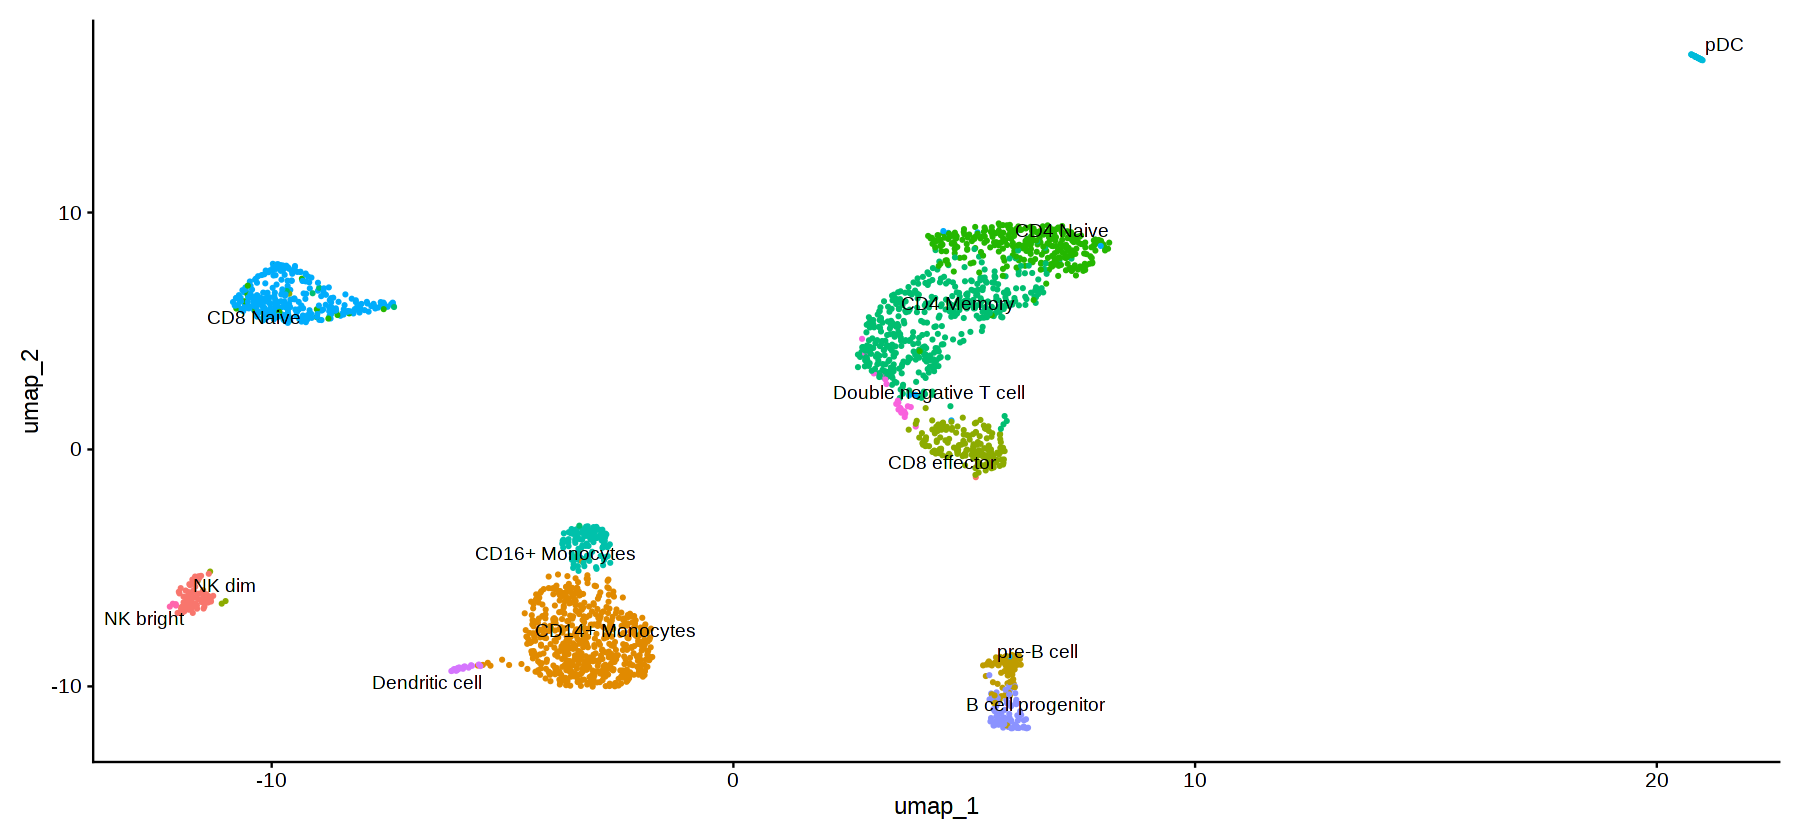

In [ ]:
DimPlot(multiome, label = TRUE, repel = TRUE, reduction = "umap") + NoLegend()

## Step 7: Linking peaks to genes
For each gene, we can find the set of peaks that may regulate the gene by by computing the correlation between gene expression and accessibility at nearby peaks, and correcting for bias due to GC content, overall accessibility, and peak size. See the Signac paper for a full description of the method we use to link peaks to genes.

Running this step on the whole genome can be time consuming, so here we demonstrate peak-gene links for a subset of genes as an example. The same function can be used to find links for all genes by omitting the genes.use parameter:

In [ ]:
DefaultAssay(multiome) <- "ATAC"

# first compute the GC content for each peak
multiome <- RegionStats(multiome, genome = BSgenome.Hsapiens.UCSC.hg38)

# link peaks to genes
multiome <- LinkPeaks(
  object = multiome,
  peak.assay = "ATAC",
  expression.assay = "SCT",
  genes.use = c("LYZ", "MS4A1")
)

Warning message in RegionStats.default(object = regions, genome = genome, verbose = verbose, :
"Not all seqlevels present in supplied genome"
Testing 2 genes and 96703 peaks

Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': GL000194.1, GL000195.1, GL000205.2, GL000219.1, KI270713.1, KI270721.1, KI270726.1, KI270727.1, KI270734.1
  - in 'y': chrMT
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning)."
Warning message in size + sum(size_args, na.rm = FALSE):
"NAs produced by integer overflow"
Warning message:
"UNRELIABLE VALUE: One of the 'future.apply' iterations ('future_lapply-1') unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parall

We can visualize these links using the CoveragePlot() function, or alternatively we could use the CoverageBrowser() function in an interactive analysis:

In [ ]:
idents.plot <- c("pre-B cell", "B cell progenitor", "Dendritic cell",
                 "CD14+ Monocytes", "CD16+ Monocytes", "CD8 effector", "CD8 Naive")

multiome <- SortIdents(multiome)

p1 <- CoveragePlot(
  object = multiome,
  region = "MS4A1",
  features = "MS4A1",
  expression.assay = "SCT",
  idents = idents.plot,
  extend.upstream = 500,
  extend.downstream = 10000
)

p2 <- CoveragePlot(
  object = multiome,
  region = "LYZ",
  features = "LYZ",
  expression.assay = "SCT",
  idents = idents.plot,
  extend.upstream = 8000,
  extend.downstream = 5000
)


Creating pseudobulk profiles for 13 variables across 98319 features

Computing euclidean distance between pseudobulk profiles

Clustering distance matrix



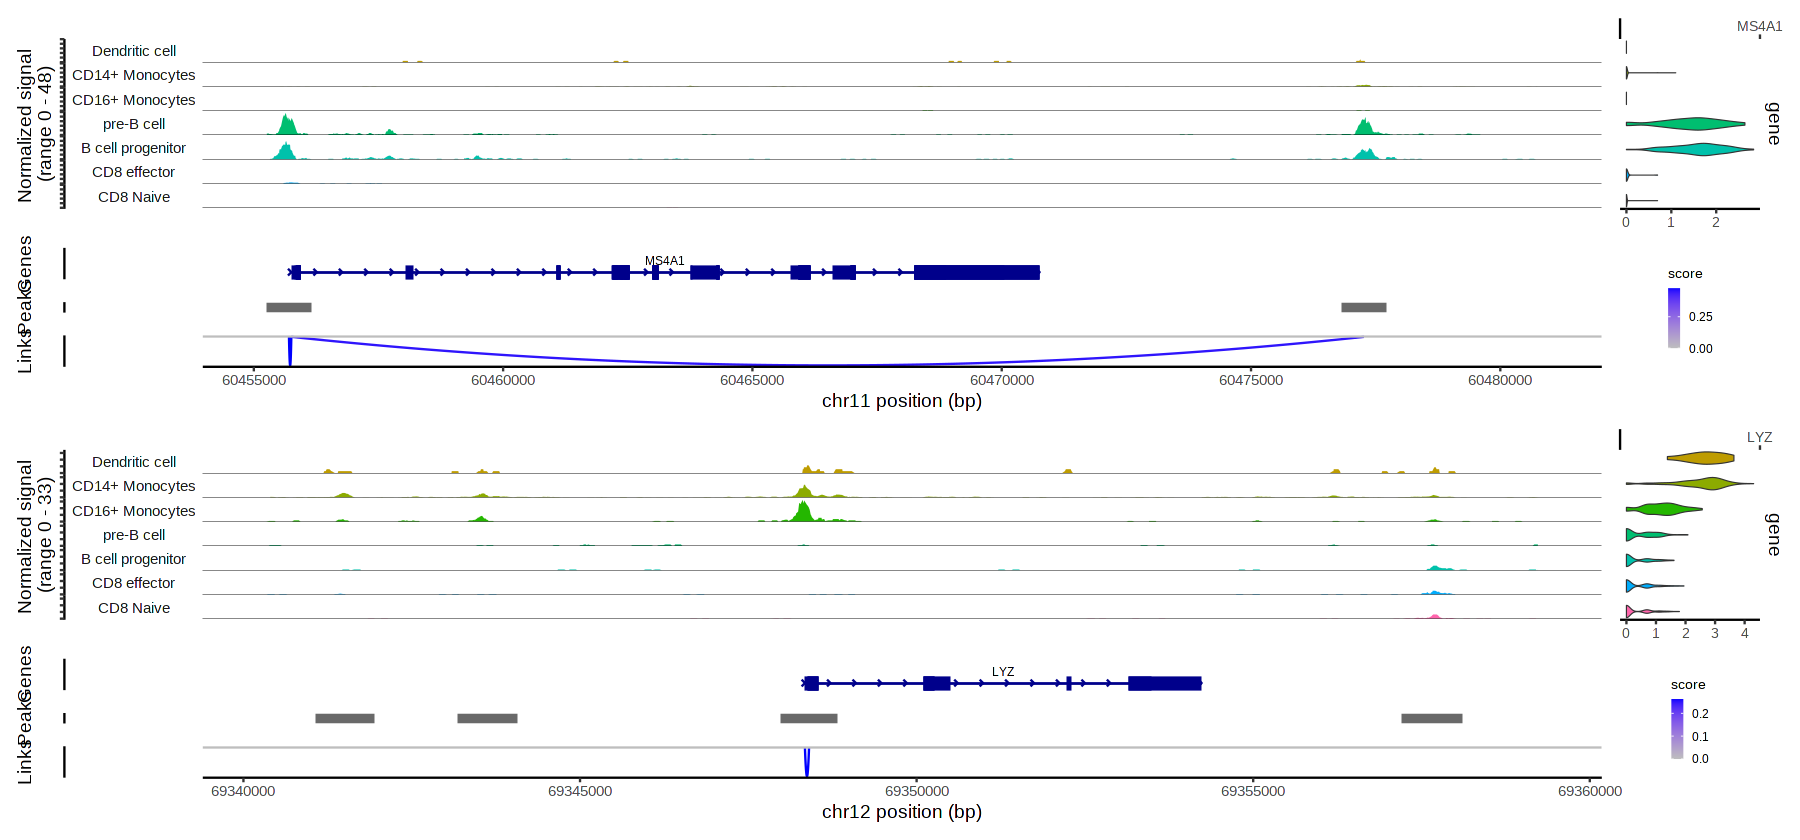

In [ ]:
patchwork::wrap_plots(p1, p2, ncol = 1)

In [ ]:
multiome@assays$SCT <- NULL
multiome@assays$RNA < NULL

ERROR: Error in multiome@assays$RNA < NULL: comparison (<) is possible only for atomic and list types


In [ ]:
save(multiome, file = "multiome.RData")

In [ ]:
rm(list = ls())
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,18136028,968.6,26569360,1419.0,26569360,1419.0
Vcells,144883473,1105.4,436289552,3328.7,1051735875,8024.2
